 Amplitude Modulation

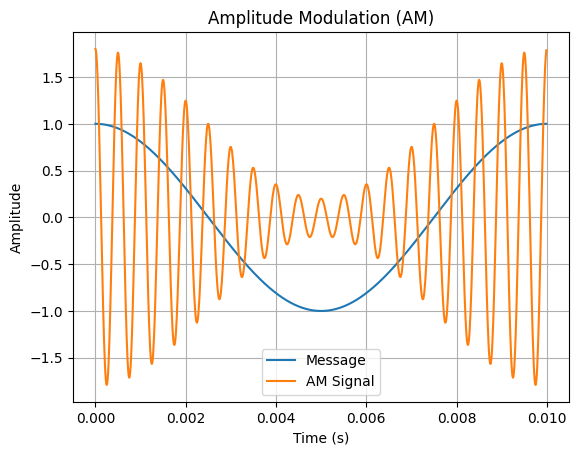

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 100000      # Sampling rate
T = 0.01         # Duration
t = np.arange(0, T, 1/Fs)

fc = 2000        # Carrier frequency
fm = 100         # Message frequency

m = np.cos(2*np.pi*fm*t)                 # Message
ka = 0.8                                  # Modulation index
s_am = (1 + ka*m) * np.cos(2*np.pi*fc*t)  # AM signal

plt.figure()
plt.title("Amplitude Modulation (AM)")
plt.plot(t, m, label="Message")
plt.plot(t, s_am, label="AM Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


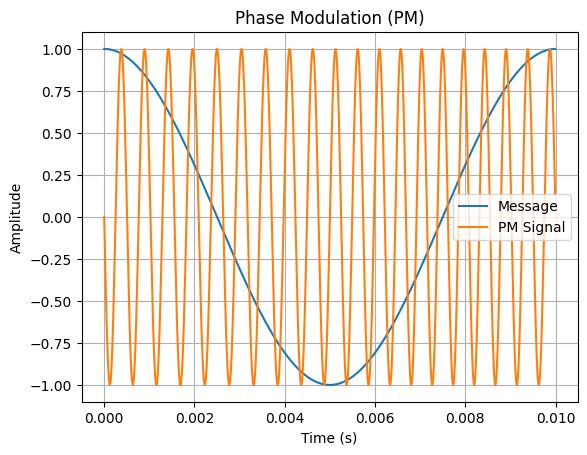

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 100000
T = 0.01
t = np.arange(0, T, 1/Fs)

fc = 2000
fm = 100

m = np.cos(2*np.pi*fm*t)
kp = np.pi/2                              # Phase sensitivity
s_pm = np.cos(2*np.pi*fc*t + kp*m)

plt.figure()
plt.title("Phase Modulation (PM)")
plt.plot(t, m, label="Message")
plt.plot(t, s_pm, label="PM Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


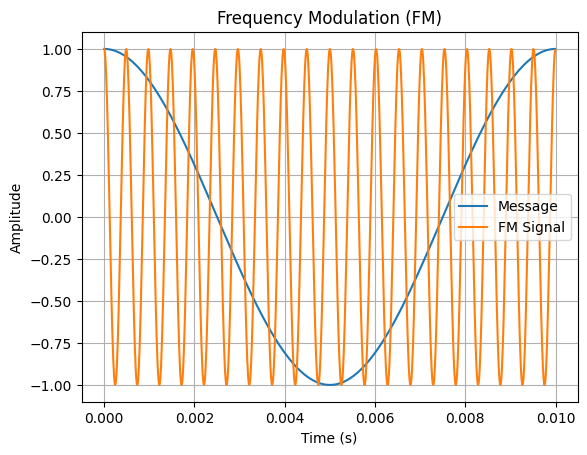

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 100000
T = 0.01
t = np.arange(0, T, 1/Fs)

fc = 2000
fm = 100

m = np.cos(2*np.pi*fm*t)
kf = 2*np.pi*50                           # Frequency sensitivity
m_int = np.cumsum(m) / Fs                 # Integral of message
s_fm = np.cos(2*np.pi*fc*t + kf*m_int)

plt.figure()
plt.title("Frequency Modulation (FM)")
plt.plot(t, m, label="Message")
plt.plot(t, s_fm, label="FM Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


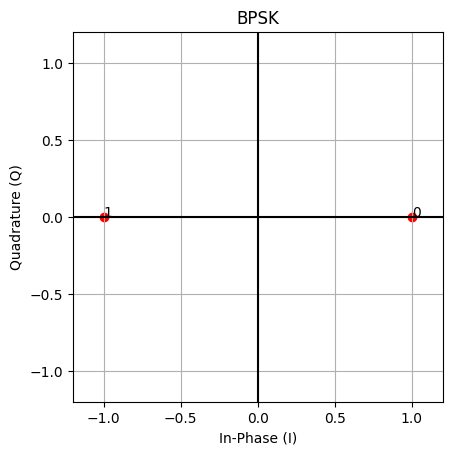

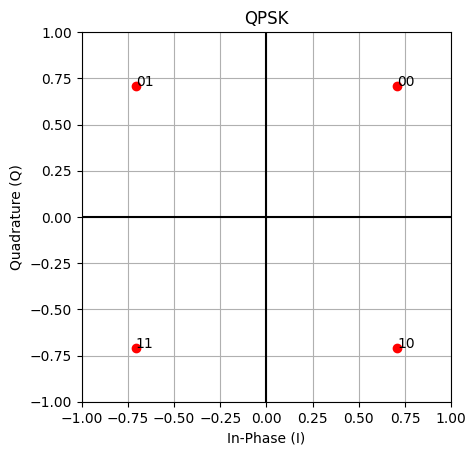

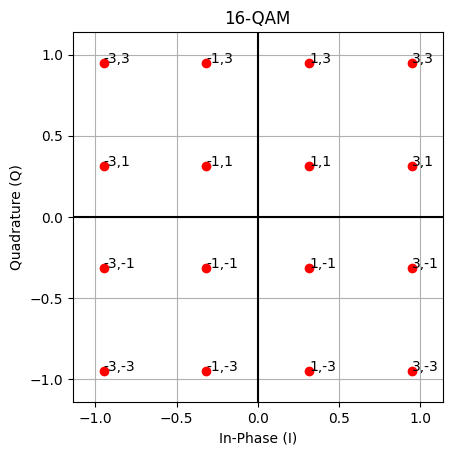

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_constellation(points, labels=None, title="Constellation"):
    pts = np.array(points).astype(complex)
    plt.figure()
    plt.title(title)
    plt.scatter(pts.real, pts.imag, c="red")
    for i, z in enumerate(pts):
        if labels is not None:
            plt.annotate(labels[i], (z.real, z.imag))
    lim = max(1.2*np.max(np.abs(pts.real)), 1.2*np.max(np.abs(pts.imag)), 1.0)
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.axhline(0, color="black")
    plt.axvline(0, color="black")
    plt.xlabel("In-Phase (I)")
    plt.ylabel("Quadrature (Q)")
    plt.gca().set_aspect("equal", "box")
    plt.grid(True)
    plt.show()

# --- BPSK ---
bpsk_points = [1+0j, -1+0j]
plot_constellation(bpsk_points, labels=["0", "1"], title="BPSK")

# --- QPSK (Gray) ---
qpsk_points = [
    (1+1j)/np.sqrt(2),   # 00
    (-1+1j)/np.sqrt(2),  # 01
    (-1-1j)/np.sqrt(2),  # 11
    (1-1j)/np.sqrt(2)    # 10
]
plot_constellation(qpsk_points, labels=["00","01","11","10"], title="QPSK")

# --- 16-QAM ---
levels = np.array([-3, -1, 1, 3])
norm = np.sqrt(10)  # Normalization
qam16_points = []
labels = []
for i in levels:
    for q in levels[::-1]:
        qam16_points.append((i + 1j*q)/norm)
        labels.append(f"{i},{q}")
plot_constellation(qam16_points, labels=labels, title="16-QAM")


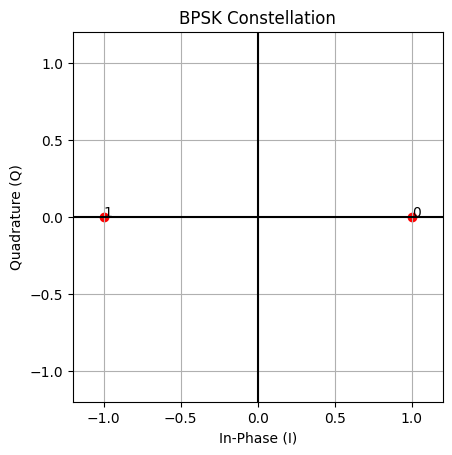

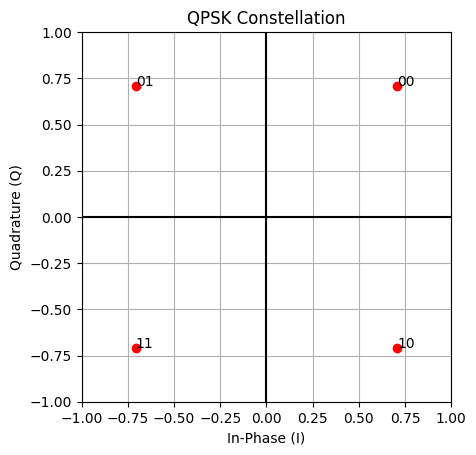

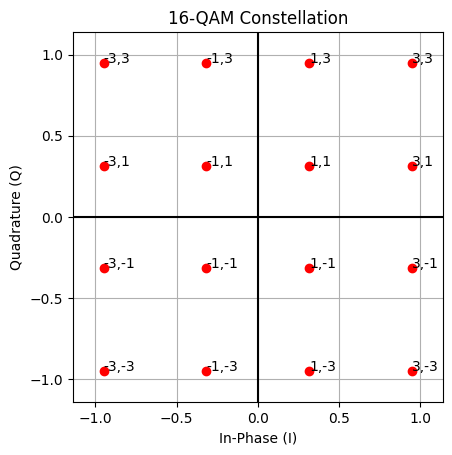

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_constellation(points, labels=None, title="Constellation"):
    pts = np.array(points).astype(complex)
    plt.figure()
    plt.title(title)
    plt.scatter(pts.real, pts.imag, c="red")
    
    # Label points if given
    for i, z in enumerate(pts):
        if labels is not None:
            plt.annotate(labels[i], (z.real, z.imag))
    
    # Axis limits
    lim = max(1.2*np.max(np.abs(pts.real)), 1.2*np.max(np.abs(pts.imag)), 1.0)
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    
    # Axis lines
    plt.axhline(0, color="black")
    plt.axvline(0, color="black")
    
    plt.xlabel("In-Phase (I)")
    plt.ylabel("Quadrature (Q)")
    plt.gca().set_aspect("equal", "box")
    plt.grid(True)
    plt.show()

# --- BPSK ---
bpsk_points = [1+0j, -1+0j]
plot_constellation(bpsk_points, labels=["0", "1"], title="BPSK Constellation")

# --- QPSK (Gray mapping) ---
qpsk_points = [
    (1+1j)/np.sqrt(2),   # 00
    (-1+1j)/np.sqrt(2),  # 01
    (-1-1j)/np.sqrt(2),  # 11
    (1-1j)/np.sqrt(2)    # 10
]
plot_constellation(qpsk_points, labels=["00","01","11","10"], title="QPSK Constellation")

# --- 16-QAM ---
levels = np.array([-3, -1, 1, 3])
norm = np.sqrt(10)  # Normalize average symbol energy to 1
qam16_points = []
labels = []
for i in levels:
    for q in levels[::-1]:
        qam16_points.append((i + 1j*q)/norm)
        labels.append(f"{i},{q}")
plot_constellation(qam16_points, labels=labels, title="16-QAM Constellation")


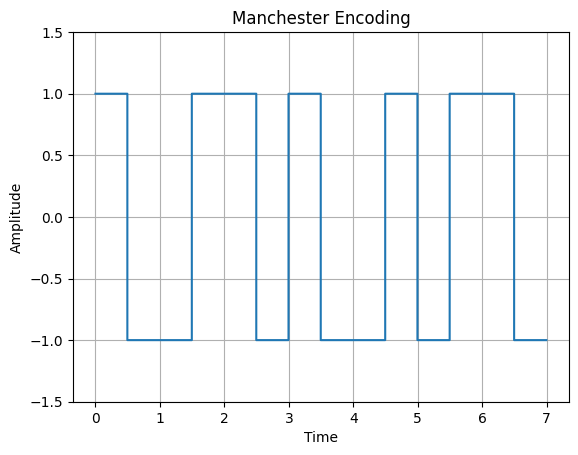

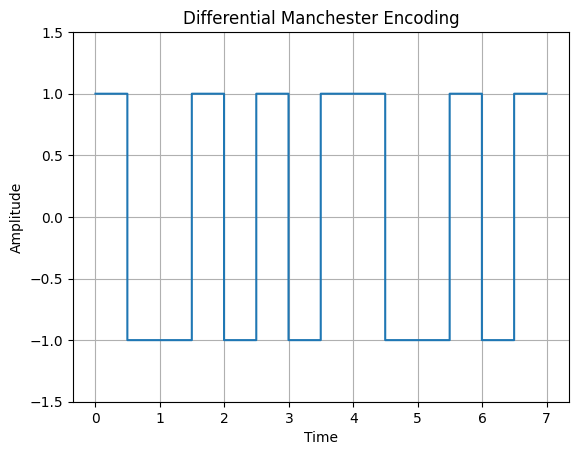

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Manchester encoding
def manchester(bits, bitrate=1):
    T = 1/bitrate
    t = np.linspace(0, len(bits)*T, len(bits)*200, endpoint=False)  # oversampling
    signal = np.zeros_like(t)

    for i, bit in enumerate(bits):
        t_start = i*T
        idx = (t >= t_start) & (t < t_start+T)
        half = (t[idx] - t_start) < (T/2)

        if bit == 1:
            signal[idx] = np.where(half, 1, -1)  # High->Low
        else:
            signal[idx] = np.where(half, -1, 1)  # Low->High
    return t, signal

# Differential Manchester encoding
def differential_manchester(bits, bitrate=1):
    T = 1/bitrate
    t = np.linspace(0, len(bits)*T, len(bits)*200, endpoint=False)
    signal = np.zeros_like(t)
    
    last_level = -1  # Start at -1
    for i, bit in enumerate(bits):
        t_start = i*T
        idx = (t >= t_start) & (t < t_start+T)
        half = (t[idx] - t_start) < (T/2)

        if bit == 1:  # Transition at start
            last_level *= -1
            signal[idx] = np.where(half, last_level, -last_level)
        else:         # No transition at start
            signal[idx] = np.where(half, last_level, -last_level)
        last_level = signal[idx][-1]
    return t, signal

# Test with random bit sequence
bits = [1, 0, 1, 1, 0, 0, 1]

# Plot Manchester
t, s1 = manchester(bits)
plt.figure()
plt.title("Manchester Encoding")
plt.plot(t, s1, drawstyle="steps-pre")
plt.ylim(-1.5, 1.5)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Plot Differential Manchester
t, s2 = differential_manchester(bits)
plt.figure()
plt.title("Differential Manchester Encoding")
plt.plot(t, s2, drawstyle="steps-pre")
plt.ylim(-1.5, 1.5)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
